In [ ]:
import pandas as pd
import google.colab.drive as drive
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense 
from sklearn.model_selection import train_test_split,KFold
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import MinMaxScaler 
from sklearn import preprocessing

In [ ]:
import pandas as pd
import google.colab.drive as drive
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense 
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import MinMaxScaler 
drive.mount('/content/drive')
df=pd.read_csv('./drive/MyDrive/2022_2nd_semister/AI_programming/DATA/samsung.csv')
print(df.dtypes)
df.isna().sum().sort_values(ascending = False).head(10)
print(df)

del df['date']
df2=df.astype(float)
print(df2)
print(df2.dtypes)
df2.isna().sum().sort_values(ascending = False).head(10)
print(df2.isnull().any)

#결측치 없음, 자료형 int,float

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


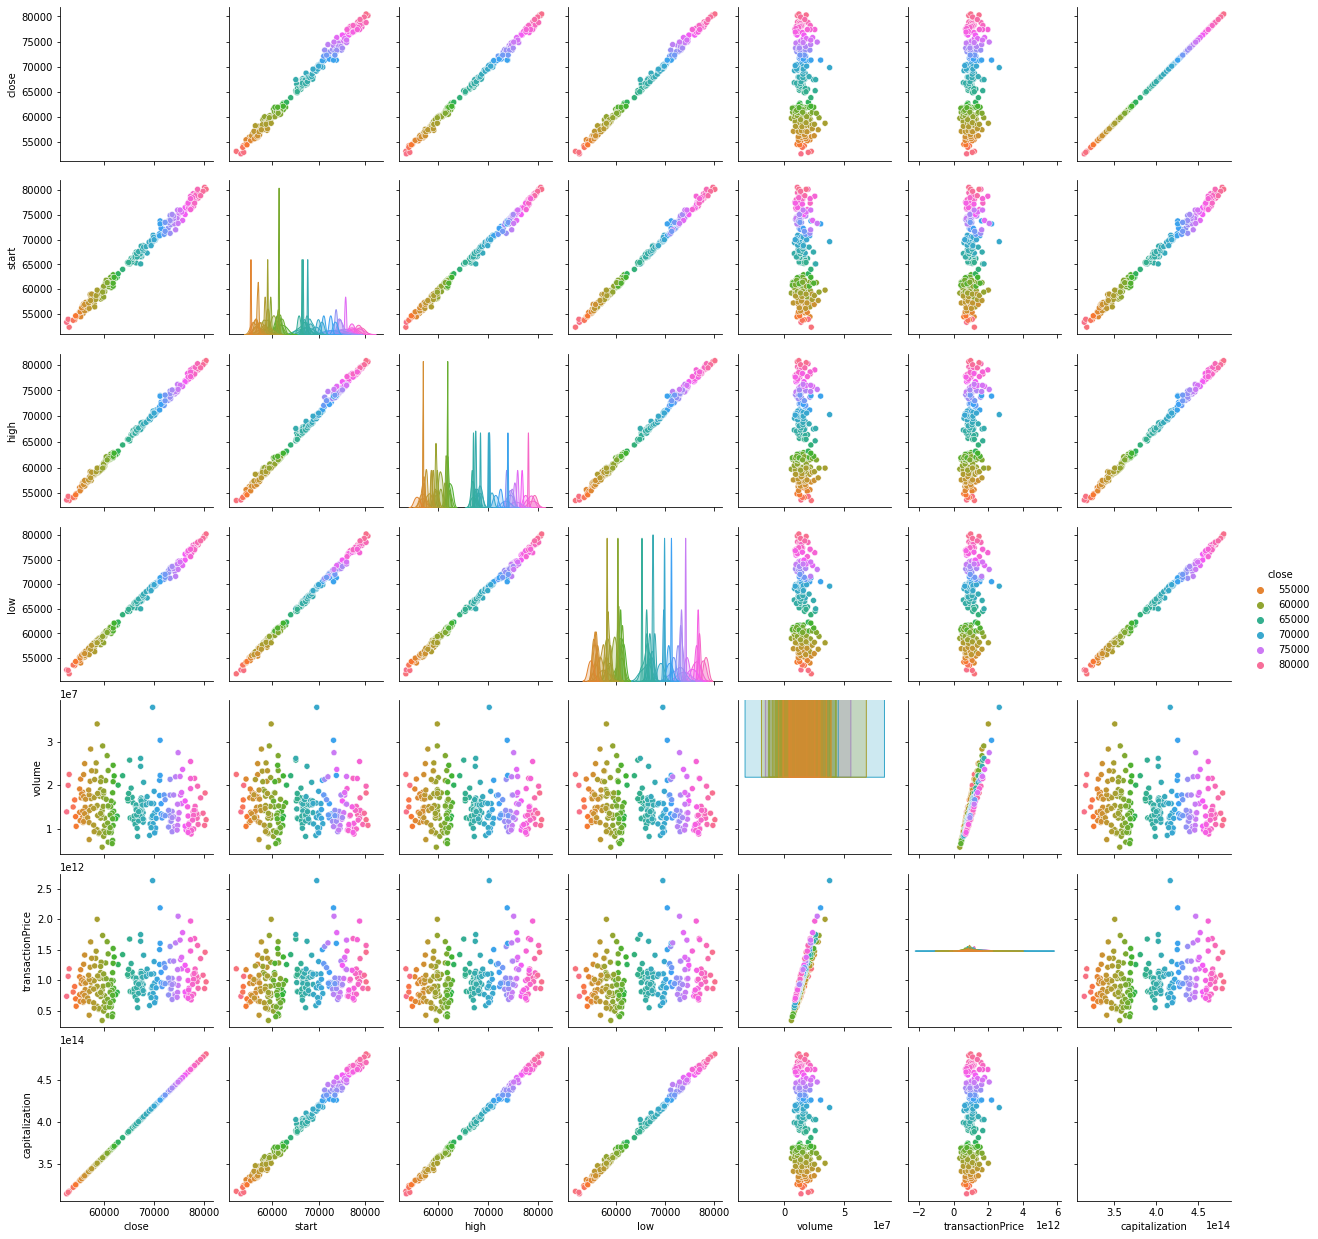

In [12]:
#상곤관계 분석
import pandas as pd
import google.colab.drive as drive
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense 
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import MinMaxScaler 
drive.mount('/content/drive')
df=pd.read_csv('./drive/MyDrive/2022_2nd_semister/AI_programming/DATA/samsung.csv')

df.isna()
df = pd.get_dummies(df)
df = df.fillna(df.mean())

#data scaling
_scaler= MinMaxScaler()
_scaler.fit(df)

df_corr = df.corr()
df_corr_sort = df_corr.sort_values('close', ascending = False)
df_corr_sort['close']

cols = ['close', 'start', 'high', 'low', 'volume','transactionPrice','capitalization']
sns.pairplot(data = df, vars = cols, hue = 'close', palette = 'husl')
plt.show()
#start,high,low,capitalization 이 강한 양의 상관관계를 가짐

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        start      high       low  capitalization
79   0.318021  0.305147  0.330986        0.329751
148  0.501767  0.496324  0.503521        0.505374
22   0.098940  0.099265  0.116197        0.118279
54   0.226148  0.194853  0.228873        0.207882
232  0.879859  0.908088  0.869718        0.867384
..        ...       ...       ...             ...
7    0.381625  0.352941  0.369718        0.369173
242  0.685512  0.713235  0.690141        0.706093
152  0.540636  0.518382  0.535211        0.516127
153  0.547703  0.533088  0.549296        0.548386
225  0.939929  0.948529  0.950704        0.960578

[198 rows x 4 columns]         start      high       low  capitalization
208  0.893993  0.889706  0.883803        0.892475
118  0.537102  0.511029  0.524648        0.530464
215  0.862191  0.882353  0.873239        0.870968
243  0.749117  0.753676  0.711268        0.7060

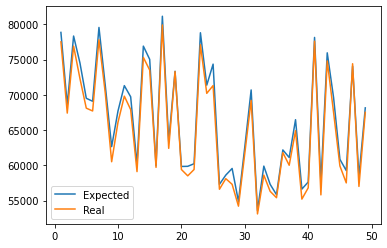

In [21]:
#learning Model
import pandas as pd
import google.colab.drive as drive
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense 
from sklearn.model_selection import train_test_split,KFold
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import MinMaxScaler 
from sklearn import preprocessing

drive.mount('/content/drive')
df2=pd.read_csv('./drive/MyDrive/2022_2nd_semister/AI_programming/DATA/samsung.csv')

del df2['date']
df=df2.astype(float)

min_max_scaler_1 = preprocessing.MinMaxScaler()
df[['start', 'high', 'low', 'volume','transactionPrice','capitalization']] = min_max_scaler_1.fit_transform(df[['start', 'high', 'low', 'volume','transactionPrice','capitalization']])
min_max_scaler_2 = preprocessing.MinMaxScaler()
df['close']=min_max_scaler_2.fit_transform(df['close'].values.reshape(-1,1))

#set data
X_cate=['start', 'high', 'low','capitalization']
X=df[X_cate]
y=df['close']

#divide data test/train
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train, X_test,y_train,y_test)

#makeModel Using K-fold, validation=0.25 -> 6:2:2
k=5
kfold=KFold(n_splits=k,shuffle=True)
acc_score=[]

for train_index, test_index in kfold.split(X_train):  #인수 값 신경쓰기
  X_train__, X_test__ = X_train.iloc[train_index, :], X_train.iloc[test_index, :]
  y_train__, y_test__ = y_train.iloc[train_index], y_train.iloc[test_index]

  model=Sequential()
  model.add(Dense(40,input_dim=4,activation='relu'))
  model.add(Dense(30,activation='relu'))
  model.add(Dense(50,activation='relu'))
  model.add(Dense(1))
  model.summary()
  #learning
  model.compile(loss='mean_squared_error',optimizer='adam',metrics='mse')
  early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 3)
  modelpath = './drive/MyDrive/2022_2nd_semister/AI_programming/savefile/'
  checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 0, save_best_only = True)

  model.fit(X_train__,y_train__,epochs=1000,batch_size=50,validation_split=0.25,verbose=1,callbacks=[early_stopping_callback,checkpointer])

#let_ME_S2
rescaled_real = min_max_scaler_2.inverse_transform(np.array(y_test).reshape(-1,1))

print(df['close'])
print(y)

real_prices = []
pred_prices = []
X_num = []


n_iter = 0

#MinMax to Real
Y_prediction = model.predict(X_test).flatten()
rescaled_pred = min_max_scaler_2.inverse_transform(np.array(Y_prediction).reshape(-1,1))


for i in range(49):
  real = rescaled_real[i]
  prediction = rescaled_pred[i]
  print('Real price: {}, Expected price: {}'.format(real, prediction))
  real_prices.append(real)
  pred_prices.append(prediction)
  n_iter = n_iter + 1
  X_num.append(n_iter)

plt.plot(X_num, pred_prices, label = 'Expected')
plt.plot(X_num, real_prices, label = 'Real')
plt.legend()
plt.show()
